In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Evaluasi Model 

In [9]:
data_test = pd.read_csv('./EvaluasiModel.csv', encoding='cp1252')
data_test

,URL,result_model,result_extension
0,http://1501broadway.com/,nonxss,nonxss
1,http://abcnews.go.com/Business/,nonxss,nonxss
2,http://academic.brooklyn.cuny.edu/education/jl...,nonxss,nonxss
3,http://ai-depot.com/,nonxss,nonxss
4,http://aiinfinance.com/,nonxss,nonxss
...,...,...,...
220,http://libguides.mit.edu/searchtags.php?iid=14...,xss,xss
221,http://libguides.olympic.edu/searchtags.php?ii...,xss,xss
222,http://libguides.princeton.edu/searchtags.php?...,xss,xss
223,http://libguides.sbuniv.edu/searchtags.php?iid...,xss,xss


In [10]:
data_test.describe()

,URL,result_model,result_extension
count,225,225,225
unique,225,2,2
top,http://guides.lib.virginia.edu/searchtags.php?...,xss,xss
freq,1,113,114


In [11]:
data_test['URL'].duplicated().sum()

0

In [52]:
from sklearn.metrics import confusion_matrix
import pandas as pd

data_test = pd.read_csv('./EvaluasiModel.csv', encoding='cp1252')

expected = data_test['result_model']
predicted = data_test['result_extension']
results = confusion_matrix(expected, predicted)
print(results)


# Output :
#              |   pred. nonxss    |   pred. xss    |
# true nonxss  |       TP          |       FN       |
# true xss     |       FP          |       TN       |

[[109   3]
 [  2 111]]


In [53]:
tp, fp, fn, tn = confusion_matrix(predicted, expected).ravel()
(tp, fp, fn, tn)

(109, 2, 3, 111)

# Eksperimen API 

In [54]:
data_test = pd.read_csv('./eksperimen.csv', encoding='cp1252')
data_test

,URL,result_model,result_withAPI,result_withoutAPI
0,http://bucuresti.adagio4.eu/?keywords=Busindre...,XSS,XSS,XSS
1,http://dublin.adagio4.eu/?keywords=Busindre%22...,XSS,XSS,XSS
2,http://athinai.adagio4.eu/?keywords=Busindre%2...,XSS,XSS,XSS
3,http://electionombudsman.adagio4.eu/?keywords=...,XSS,XSS,XSS
4,http://berlin.adagio4.eu/?keywords=Busindre%22...,XSS,XSS,XSS
...,...,...,...,...
4995,http://spots.tibiacity.org/spot.php?user=%3Csc...,XSS,XSS,XSS
4996,http://webfile.com/search.php?/search.php _cha...,XSS,XSS,XSS
4997,http://www.hacker-soft.net/search.php?type=nam...,XSS,XSS,XSS
4998,http://www.eastangliaemails.com/search.php?q=<...,XSS,XSS,XSS


In [55]:
data_test['URL'].duplicated().sum()

32

In [58]:
data_test = data_test.drop_duplicates()

In [59]:
data_test['URL'].duplicated().sum()

0

### Evaluasi dengan API

In [60]:
expected = data_test['result_model']
predicted = data_test['result_withAPI']
results = confusion_matrix(expected, predicted)
print(results)

# Output :
#              |   pred. nonxss    |   pred. xss    |
# true nonxss  |       TP          |       FN       |
# true xss     |       FP          |       TN       |

[[1968    0]
 [   0 3000]]


In [68]:
matrix = classification_report(expected,predicted)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     Non-XSS       1.00      1.00      1.00      1993
         XSS       1.00      1.00      1.00      3007

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



#### Visualisasi Dengan API

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

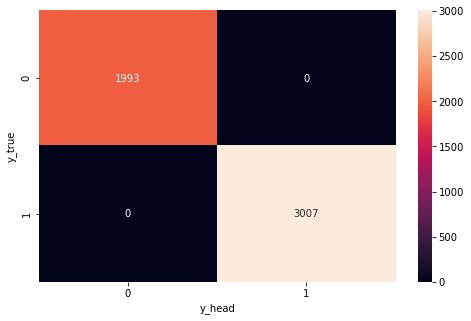

In [67]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(expected, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### Evaluasi tanpa API

In [62]:
expected = data_test['result_model']
predicted = data_test['result_withoutAPI']
results = confusion_matrix(expected, predicted)
print(results)

# Output :
#              |   pred. nonxss    |   pred. xss    |
# true nonxss  |       TP          |       FN       |
# true xss     |       FP          |       TN       |

[[1993    0]
 [   0 3007]]


In [63]:
matrix = classification_report(expected,predicted)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     Non-XSS       1.00      1.00      1.00      1993
         XSS       1.00      1.00      1.00      3007

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



#### Visualisasi Tanpa API

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

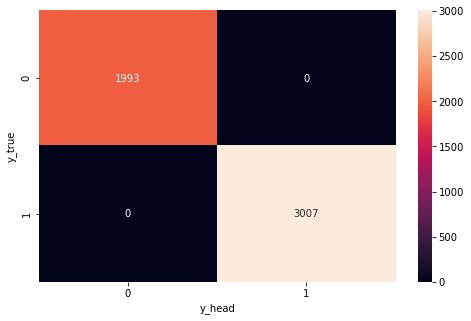

In [65]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(expected, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()